In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
phldata = pd.read_csv("phldata.csv")
phldata.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 112 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    P_NAME                        4046 non-null   object 
 1    P_STATUS                      4046 non-null   int64  
 2    P_MASS                        1597 non-null   float64
 3    P_MASS_ERROR_MIN              1466 non-null   float64
 4    P_MASS_ERROR_MAX              1466 non-null   float64
 5    P_RADIUS                      3139 non-null   float64
 6    P_RADIUS_ERROR_MIN            3105 non-null   float64
 7    P_RADIUS_ERROR_MAX            3105 non-null   float64
 8    P_YEAR                        4046 non-null   int64  
 9    P_UPDATED                     4046 non-null   object 
 10   P_PERIOD                      3936 non-null   float64
 11   P_PERIOD_ERROR_MIN            3805 non-null   float64
 12   P_PERIOD_ERROR_MAX            3805 non-null   

In [3]:
#Basic data cleaning
#code to rid of columns by condition
maxNAs = 1000 #change to remove columns that have <= specified amt of NAs
phldata = phldata.loc[:, (phldata.isnull().sum(axis=0) <= maxNAs)]
phldata.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4046 non-null   object 
 1   P_STATUS                 4046 non-null   int64  
 2   P_RADIUS                 3139 non-null   float64
 3   P_RADIUS_ERROR_MIN       3105 non-null   float64
 4   P_RADIUS_ERROR_MAX       3105 non-null   float64
 5   P_YEAR                   4046 non-null   int64  
 6   P_UPDATED                4046 non-null   object 
 7   P_PERIOD                 3936 non-null   float64
 8   P_PERIOD_ERROR_MIN       3805 non-null   float64
 9   P_PERIOD_ERROR_MAX       3805 non-null   float64
 10  P_DETECTION              4046 non-null   object 
 11  S_NAME                   4046 non-null   object 
 12  S_RA                     4046 non-null   float64
 13  S_DEC                    4046 non-null   float64
 14  S_MAG                   

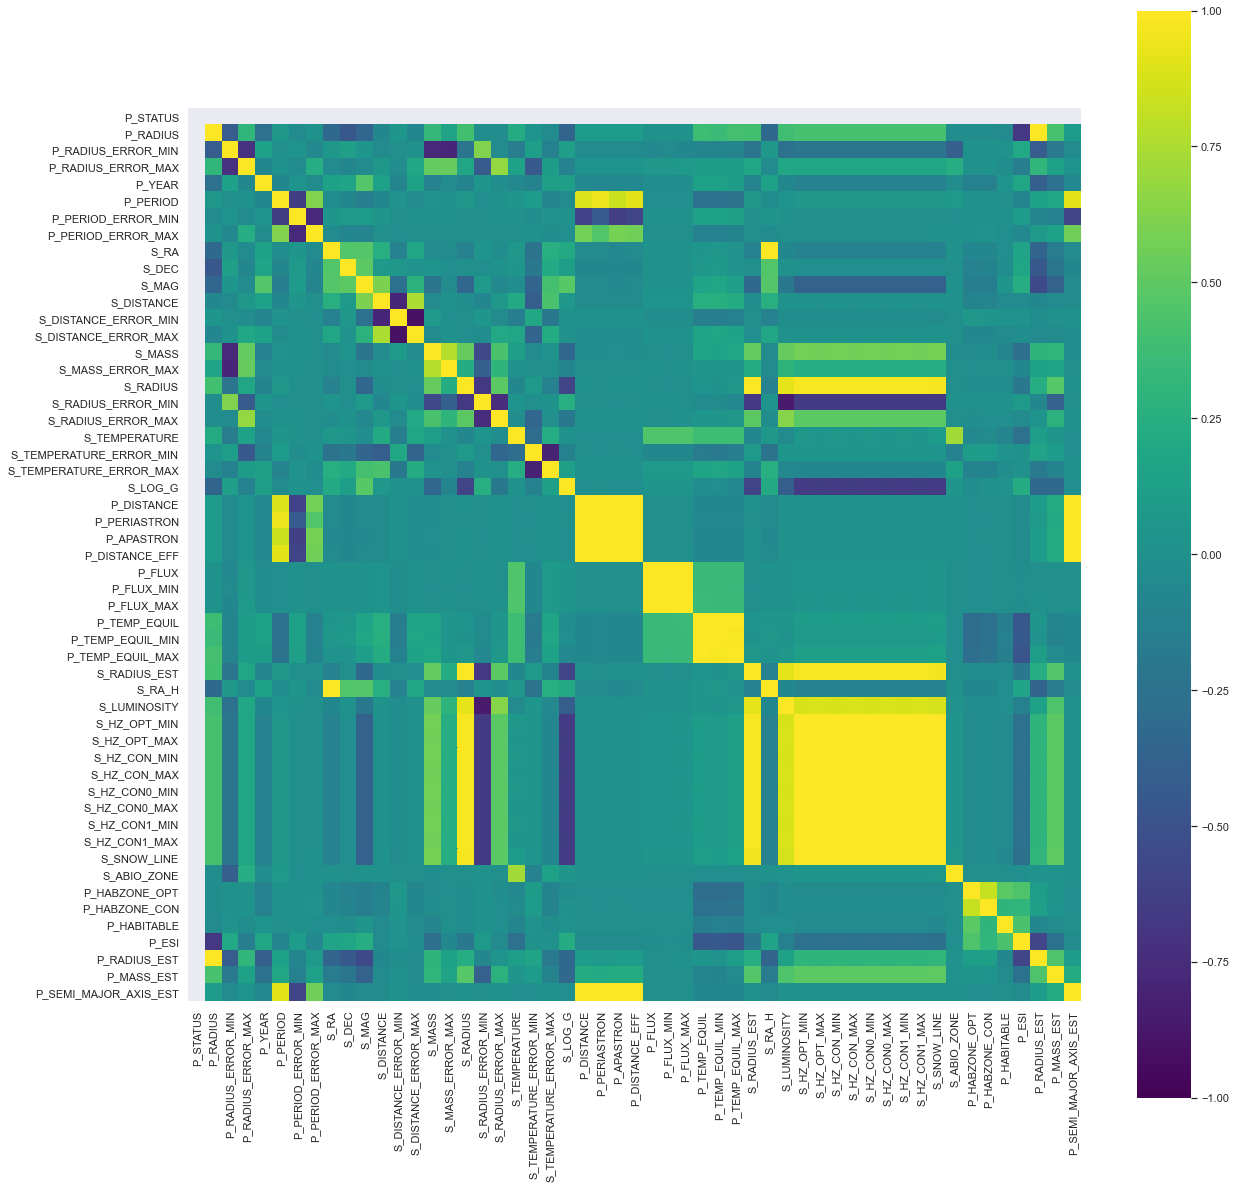

In [4]:
#Initial heatmap of everything just to visualize
f, ax = plt.subplots(figsize=(20, 20))
ax = sb.heatmap(phldata.corr(), vmin=-1,vmax=1, annot=False, cmap='viridis', square=True)

In [5]:
#Manual removal of variables that are unnecessary/similar to others and not too relevant to our study

phldata=phldata.drop(columns=['P_STATUS', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR', 'P_UPDATED', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'P_DETECTION',
                             "S_DISTANCE_ERROR_MIN", "S_DISTANCE_ERROR_MAX", "S_MASS_ERROR_MAX", "S_RADIUS_ERROR_MIN", "S_RADIUS_ERROR_MAX", "S_TEMPERATURE_ERROR_MIN", "S_TEMPERATURE_ERROR_MAX",
                             "S_LOG_G", "S_ALT_NAMES", "P_FLUX_MIN", "P_FLUX_MAX", "P_TEMP_EQUIL_MIN", "P_TEMP_EQUIL_MAX", "S_CONSTELLATION", "S_CONSTELLATION_ABR", "P_PERIASTRON", "P_APASTRON", "P_DISTANCE_EFF", 
                             "S_CONSTELLATION_ENG", "S_TIDAL_LOCK", "S_DISTANCE", "S_SNOW_LINE","S_ABIO_ZONE","S_HZ_OPT_MIN","S_HZ_OPT_MAX","S_HZ_CON_MIN","S_HZ_CON_MAX",
                             "S_HZ_CON0_MIN","S_HZ_CON0_MAX","S_HZ_CON1_MIN","S_HZ_CON1_MAX", "S_RA_H", "S_RA_T", "S_DEC_T", "S_RA", "S_RADIUS","P_HABZONE_OPT","P_HABZONE_CON"])

phldata.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_NAME                 4046 non-null   object 
 1   P_PERIOD               3936 non-null   float64
 2   S_NAME                 4046 non-null   object 
 3   S_DEC                  4046 non-null   float64
 4   S_MAG                  3868 non-null   float64
 5   S_MASS                 3281 non-null   float64
 6   S_TEMPERATURE          3840 non-null   float64
 7   P_DISTANCE             3976 non-null   float64
 8   P_FLUX                 3720 non-null   float64
 9   P_TEMP_EQUIL           3720 non-null   float64
 10  P_TYPE                 4030 non-null   object 
 11  S_RADIUS_EST           3843 non-null   float64
 12  S_TYPE_TEMP            3910 non-null   object 
 13  S_LUMINOSITY           3785 non-null   float64
 14  P_TYPE_TEMP            3720 non-null   object 
 15  P_HA

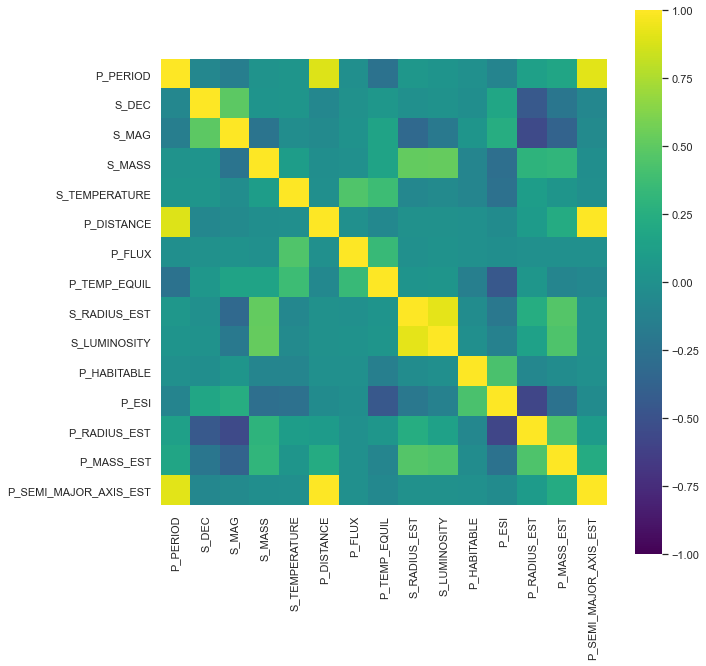

In [6]:
#heatmap after removing
f, ax = plt.subplots(figsize=(10, 10))
ax = sb.heatmap(phldata.corr(), vmin=-1,vmax=1, annot=False, cmap='viridis', square=True)

<AxesSubplot:xlabel='P_FLUX', ylabel='Count'>

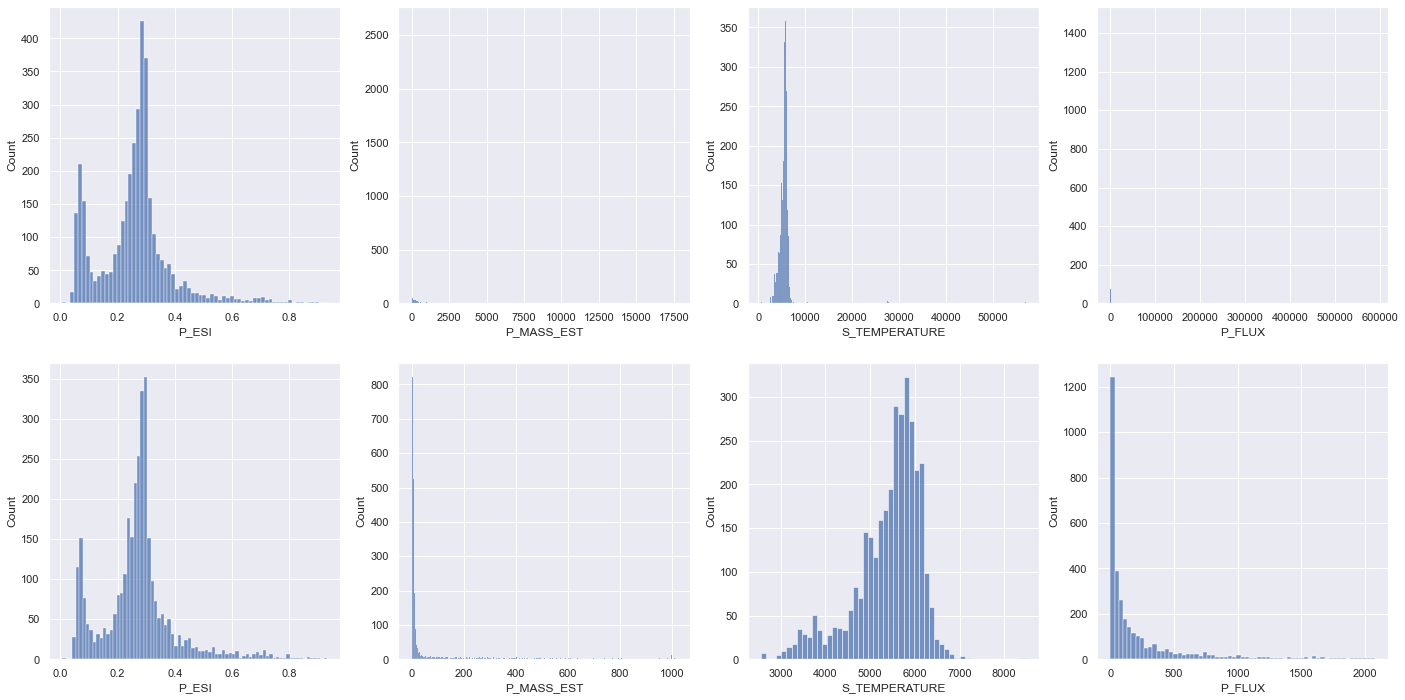

In [7]:
testdata = pd.DataFrame()
testdata[['P_MASS_EST', 'P_FLUX', 'S_TEMPERATURE', 'P_ESI']] = pd.DataFrame(phldata[["P_MASS_EST",'P_FLUX', 'S_TEMPERATURE', 'P_ESI']])

#Outlier clearing function
#thank god for stackoverflow
#sourced from https://stackoverflow.com/questions/55471750/how-do-i-remove-outliers-using-multiple-columns-pandas
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-6.0*iqr
    fence_high = q3+6.0*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#Demonstration cleaning
f, axes = plt.subplots(2, 4, figsize=(24, 12))
sb.histplot(data = testdata["P_ESI"], ax=axes[0,0])
sb.histplot(data = testdata["P_MASS_EST"], ax=axes[0,1])
sb.histplot(data = testdata["S_TEMPERATURE"], ax=axes[0,2])
sb.histplot(data = testdata["P_FLUX"], ax=axes[0,3])

for col in testdata.columns :
    if(col!='P_ESI') :
        testdata = remove_outlier(testdata, col)

sb.histplot(data = testdata["P_ESI"],ax=axes[1,0])
sb.histplot(data = testdata["P_MASS_EST"],ax=axes[1,1])
sb.histplot(data = testdata["S_TEMPERATURE"], ax=axes[1,2])
sb.histplot(data = testdata["P_FLUX"], ax=axes[1,3])

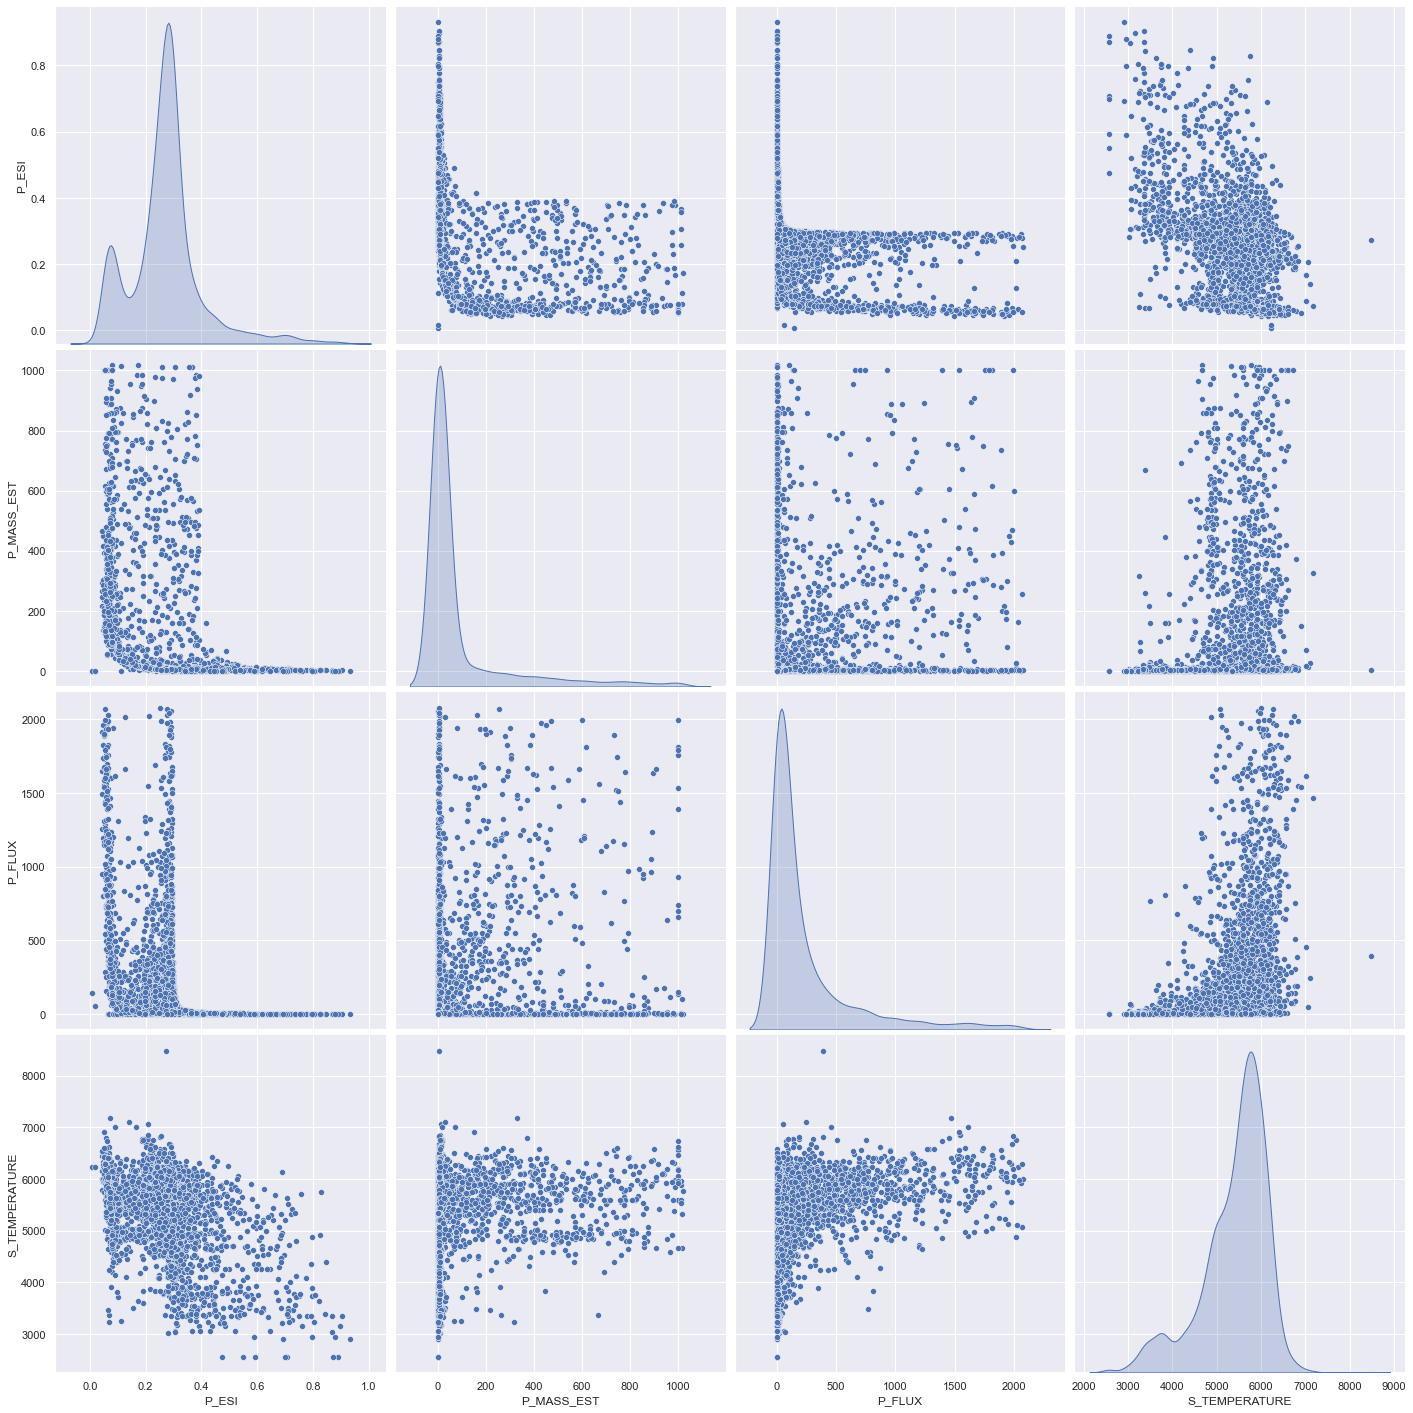

In [8]:
#Demonstration pairplots of cleaned data

sb.pairplot(testdata[['P_ESI', 'P_MASS_EST', 'P_FLUX', 'S_TEMPERATURE']], diag_kind='kde', height=5)

In [9]:
#Cleaning on original phldata set
#Clean relevant columns only: if type = float64, not P_ESI, not int64 (numerically categorial like P_HABITABLE)

for col in phldata.columns :
    if(phldata[col].dtypes=='float64' and col!='P_ESI') :
        phldata = remove_outlier(phldata, col)

In [10]:
phldata.to_csv('cleandata.csv', index=False)
#Convert to CSV to maybe separate this project in stages, use cleaned data for easier accessibility

In [11]:
#To-do list
#train test split in later stages
#Spearman's or R^2 correlation coefficients for basic statistics
#Learn tensorflow and keras for further neural network regression and machine learning classification

#IMPORTANT VARIABLES:
#   P_HABITABLE for classification
#   P_ESI for numerical non-linear regression
#   P_TYPE_TEMP to use to predict P_HABITABLE for classification